# Duke PAM Project - Undersampled PAM
## Title: Showing Example Usage of Downsampling Methods
## Author: Anthony DiSpirito III
## Github: @adispirito
## Date: November 20, 2020

### pip installs/uninstalls

In [1]:
!pip3 uninstall tensorflow_datasets -y -q
!pip3 install git+git://github.com/axd465/datasets -q

### Import Statements

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
import shutil
from functools import partial
from tensorflow.image import random_crop, random_brightness, random_contrast, \
                             random_flip_left_right, random_flip_up_down, resize
if os.path.basename(os.getcwd()) == 'examples':
    os.chdir('../')
if not os.path.exists('./utils') or not os.path.exists('./models'):
    print('Cloning Git Repo...')
    !git clone -q https://github.com/adispirito/BME590-Final_Project-Duke_PAM
    if not os.path.exists('./utils'):
        os.mkdir('./utils')
        os.rename('./BME590-Final_Project-Duke_PAM/utils', './utils')
    else:
        os.mkdir('./models')
        os.rename('./BME590-Final_Project-Duke_PAM/utils', './utils')
from utils.downsampling_utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
AUTOTUNE = os.cpu_count()//2 #tf.data.experimental.AUTOTUNE
print('Tensorflow version: ' + tf.__version__)

Tensorflow version: 2.3.1


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Load Dataset

In [3]:
(train_ds, val_ds), metadata = tfds.load('duke_pam/clean', split=['train', 'validation'], with_info=True, data_dir = 'data')

## Downsampling Methods

### Downsample and Change Image Dimensions

In [4]:
DOWN_RATIO = (1,5)
MIN_INPUT_SHAPE = (128, 128)
down_map_func = partial(downsample, down_ratio=DOWN_RATIO, min_shape = MIN_INPUT_SHAPE)
ds_down = train_ds.prefetch(tf.data.experimental.AUTOTUNE).map(lambda x: tf.numpy_function(down_map_func, [x['image']], (tf.float32,tf.float32)), num_parallel_calls=AUTOTUNE).cache()

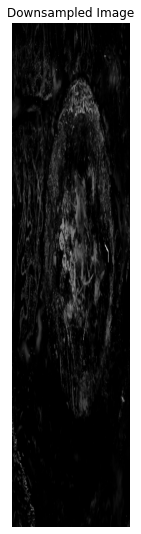

In [5]:
figsize = (7,7)
img = next(iter(ds_down))
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(img[1][...,0], cmap = 'gray')
plt.title('Downsampled Image')
plt.show()

### Downsample and Replace With Zerofill

#### Random Downsampling

In [6]:
SPARSITY = 1-(1/9)
MIN_INPUT_SHAPE = (128, 128)
down_map_func = partial(downsample_zerofill, sparsity=SPARSITY, min_shape = MIN_INPUT_SHAPE)
train_ds_down_zerofill_rand = train_ds.map(lambda x: tf.numpy_function(down_map_func, [x['image']], tf.float32), num_parallel_calls=AUTOTUNE).cache()
val_ds_down_zerofill_rand = val_ds.map(lambda x: tf.numpy_function(down_map_func, [x['image']], tf.float32), num_parallel_calls=AUTOTUNE).cache()

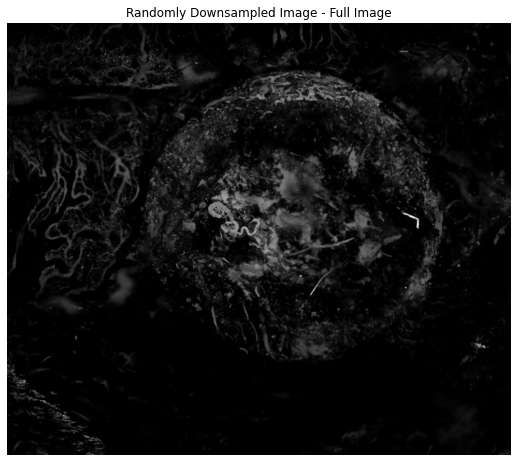

In [7]:
img = next(iter(train_ds_down_zerofill_rand))[...,0].numpy()
figsize = (7,7)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(img, cmap = 'gray')
plt.title('Randomly Downsampled Image - Full Image')
plt.show()

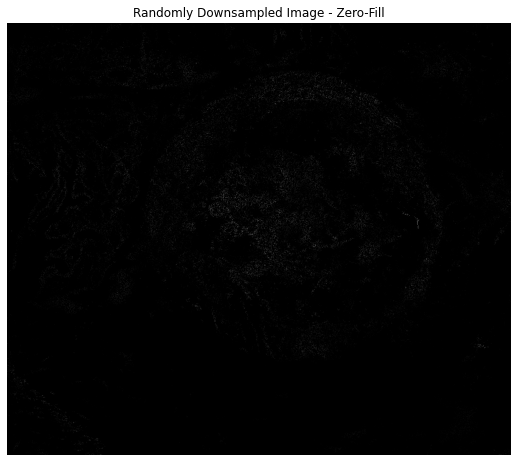

In [8]:
img = next(iter(train_ds_down_zerofill_rand))[...,1].numpy()
figsize = (7,7)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(img, cmap = 'gray')
plt.title('Randomly Downsampled Image - Zero-Fill')
plt.show()

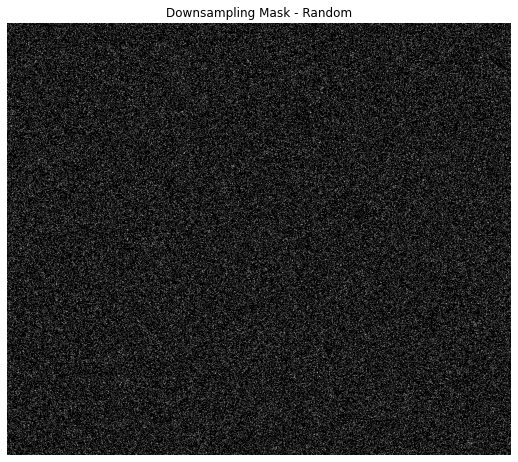

In [9]:
figsize = (7,7)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(next(iter(train_ds_down_zerofill_rand))[...,2], cmap = 'gray')
plt.title('Downsampling Mask - Random')
plt.show()

#### Uniform Downsampling

In [10]:
DOWN_RATIO = (3,3)
MIN_INPUT_SHAPE = (128, 128)
down_map_func = partial(downsample_zerofill, down_ratio=DOWN_RATIO, min_shape = MIN_INPUT_SHAPE)
train_ds_down_zerofill = train_ds.map(lambda x: tf.numpy_function(down_map_func, [x['image']], tf.float32), num_parallel_calls=AUTOTUNE).cache()
val_ds_down_zerofill = val_ds.map(lambda x: tf.numpy_function(down_map_func, [x['image']], tf.float32), num_parallel_calls=AUTOTUNE).cache()

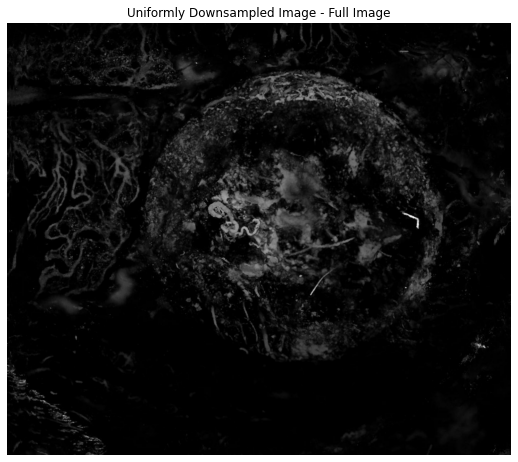

In [11]:
img = next(iter(train_ds_down_zerofill))[...,0].numpy()
figsize = (7,7)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(img, cmap = 'gray')
plt.title('Uniformly Downsampled Image - Full Image')
plt.show()

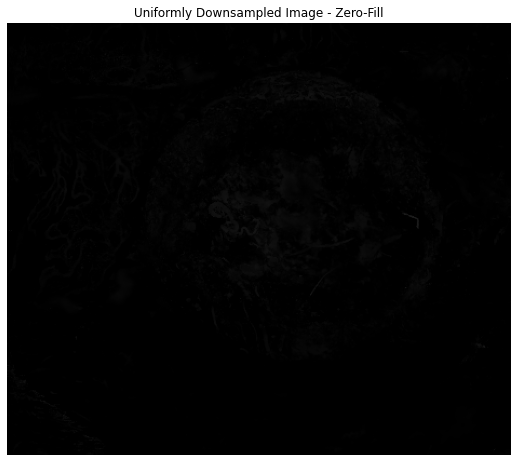

In [12]:
img = next(iter(train_ds_down_zerofill))[...,1].numpy()
figsize = (7,7)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(img, cmap = 'gray')
plt.title('Uniformly Downsampled Image - Zero-Fill')
plt.show()

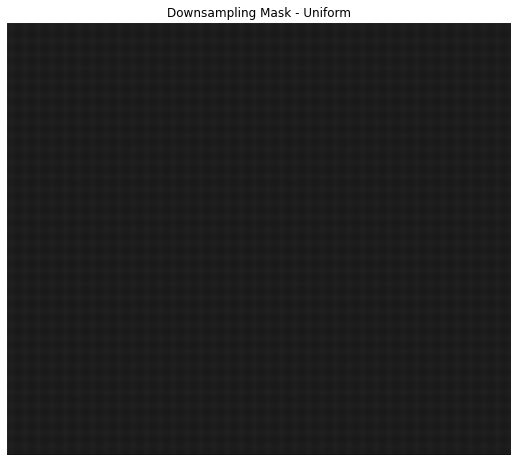

In [13]:
figsize = (7,7)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(next(iter(train_ds_down_zerofill))[...,2], cmap = 'gray')
plt.title('Downsampling Mask - Uniform')
plt.show()